In [1]:
pip install diffusers accelerate transformers safetensors sentencepiece


  Using cached diffusers-0.32.2-py3-none-any.whl.metadata (18 kB)
Using cached diffusers-0.32.2-py3-none-any.whl (3.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Check current storage
print("=== Before Cleanup ===")
!df -h /home/sagemaker-user

# Clean up cache and temporary files
!rm -rf ~/.cache/huggingface/hub/*  # Clear HuggingFace cache
!rm -rf ~/.cache/torch/*  # Clear PyTorch cache
!rm -rf /tmp/*  # Clear temporary files
!conda clean -a -y  # Clean conda cache

# Check storage after cleanup
print("\n=== After Cleanup ===")
!df -h /home/sagemaker-user

# Also clear GPU memory
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

print("\n=== GPU Memory Status ===")
print(f"Total GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
print(f"Allocated GPU Memory: {torch.cuda.memory_allocated() / 1e9:.2f} GB")
print(f"Cached GPU Memory: {torch.cuda.memory_reserved() / 1e9:.2f} GB")

=== Before Cleanup ===
Filesystem      Size  Used Avail Use% Mounted on
/dev/nvme2n1     85G   31G   55G  36% /home/sagemaker-user
There are no unused tarball(s) to remove.
There are no index cache(s) to remove.
There are no unused package(s) to remove.
There are no tempfile(s) to remove.
There are no logfile(s) to remove.

=== After Cleanup ===
Filesystem      Size  Used Avail Use% Mounted on
/dev/nvme2n1     85G  7.9G   78G  10% /home/sagemaker-user

=== GPU Memory Status ===
Total GPU Memory: 23.60 GB
Allocated GPU Memory: 0.00 GB
Cached GPU Memory: 0.00 GB


In [3]:
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline

# Clear any existing allocations
torch.cuda.empty_cache()
gc.collect()


2025-04-04 13:36:41.874268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-04 13:36:41.889921: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-04 13:36:41.894872: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-04 13:36:41.906875: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


20

In [4]:
from huggingface_hub import login
# Replace 'your_token' with your actual Hugging Face token
login("replace with your token")

In [8]:
# Load Stage 1 with memory optimizations
stage_1 = DiffusionPipeline.from_pretrained(
    "DeepFloyd/IF-I-XL-v1.0",
    variant="fp16",
    torch_dtype=torch.float16,
    use_safetensors=True,  # More memory efficient
    low_cpu_mem_usage=True
)

# Enable memory optimizations
stage_1.enable_model_cpu_offload()
stage_1.enable_attention_slicing()

# Print memory status after loading
print("\n=== Memory Status After Loading Model ===")
print(f"GPU Memory Allocated: {torch.cuda.memory_allocated() / 1e9:.2f} GB")
print(f"GPU Memory Reserved: {torch.cuda.memory_reserved() / 1e9:.2f} GB")

print("\nModel loaded successfully!")

model_index.json:   0%|          | 0.00/601 [00:00<?, ?B/s]


A mixture of fp16 and non-fp16 filenames will be loaded.
Loaded fp16 filenames:
[text_encoder/model.fp16-00002-of-00002.safetensors, safety_checker/model.fp16.safetensors, unet/diffusion_pytorch_model.fp16.safetensors, text_encoder/model.fp16-00001-of-00002.safetensors]
Loaded non-fp16 filenames:
[watermarker/diffusion_pytorch_model.safetensors
If this behavior is not expected, please check your folder structure.


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.fp16-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.fp16-00002-of-00002.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

model.safetensors.index.fp16.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/741 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.50k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/8.61G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565



=== Memory Status After Loading Model ===
GPU Memory Allocated: 0.00 GB
GPU Memory Reserved: 0.00 GB

Model loaded successfully!


In [9]:
torch.cuda.empty_cache()
gc.collect()

# Load Stage 2 with memory optimizations
stage_2 = DiffusionPipeline.from_pretrained(
    "DeepFloyd/IF-II-L-v1.0",
    text_encoder=None,
    variant="fp16",
    torch_dtype=torch.float16,
    use_safetensors=True,
    low_cpu_mem_usage=True
)

stage_2.enable_model_cpu_offload()
stage_2.enable_attention_slicing()

print("Stage 2 model loaded!")



model_index.json:   0%|          | 0.00/692 [00:00<?, ?B/s]


A mixture of fp16 and non-fp16 filenames will be loaded.
Loaded fp16 filenames:
[text_encoder/model.fp16-00002-of-00002.safetensors, safety_checker/model.fp16.safetensors, unet/diffusion_pytorch_model.fp16.safetensors, text_encoder/model.fp16-00001-of-00002.safetensors]
Loaded non-fp16 filenames:
[watermarker/diffusion_pytorch_model.safetensors
If this behavior is not expected, please check your folder structure.


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/424 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.49G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Stage 2 model loaded!


In [10]:
# Clear memory
torch.cuda.empty_cache()
gc.collect()

38

In [32]:
from diffusers.utils import pt_to_pil

# Prompt
prompt = "a trading company logo with text 'Trade' glowing"
# Generate embeddings
print("Generating text embeddings...")
prompt_embeds, negative_embeds = stage_1.encode_prompt(prompt)

# Set generator for reproducibility
generator = torch.manual_seed(0)

print("Stage 1: Generating base image...")
# Stage 1 generation
image = stage_1(
    prompt_embeds=prompt_embeds,
    negative_prompt_embeds=negative_embeds,
    generator=generator,
    output_type="pt"
).images

# Convert and show Stage 1 result
stage1_image = pt_to_pil(image)[0]

Generating text embeddings...
Stage 1: Generating base image...


  0%|          | 0/100 [00:00<?, ?it/s]

In [33]:
print("Stage 2: Upscaling and adding details...")
# Stage 2 generation
image = stage_2(
    image=image,
    prompt_embeds=prompt_embeds,
    negative_prompt_embeds=negative_embeds,
    generator=generator,
    output_type="pt"
).images

# Convert and show Stage 2 result
stage2_image = pt_to_pil(image)[0]


Stage 2: Upscaling and adding details...


  0%|          | 0/50 [00:00<?, ?it/s]

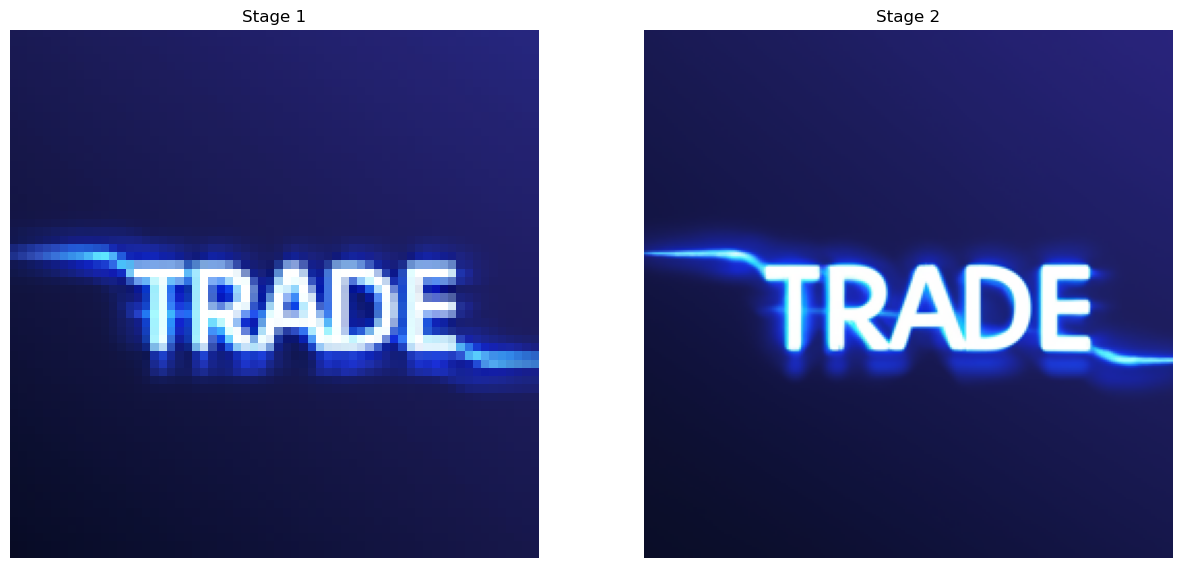

In [34]:

# Display both results
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(stage1_image)
plt.title("Stage 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stage2_image)
plt.title("Stage 2")
plt.axis('off')

plt.show()

In [ ]:
##############